## Importing the libraries

In [21]:
import plotly.offline as pyo

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
from PIL import Image

import plotly.graph_objs as go
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [22]:
!pip install wordcloud

## Uploading the dataset

In [23]:
df=pd.read_csv("C:/Users/rcavi/Desktop/Crop_recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [24]:
df.shape

(2200, 8)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [26]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


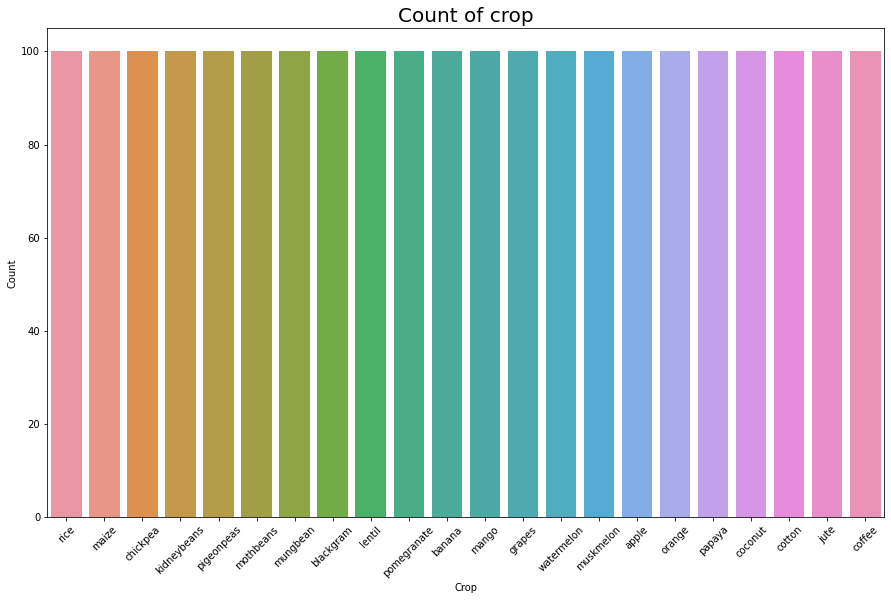

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.countplot(data=df, x='label')
ax.set(xlabel='Crop')
ax.set(ylabel='Count')
plt.xticks(rotation=45)

plt.title('Count of crop', fontsize = 20, c='black')
plt.show()



## Correlation matrix

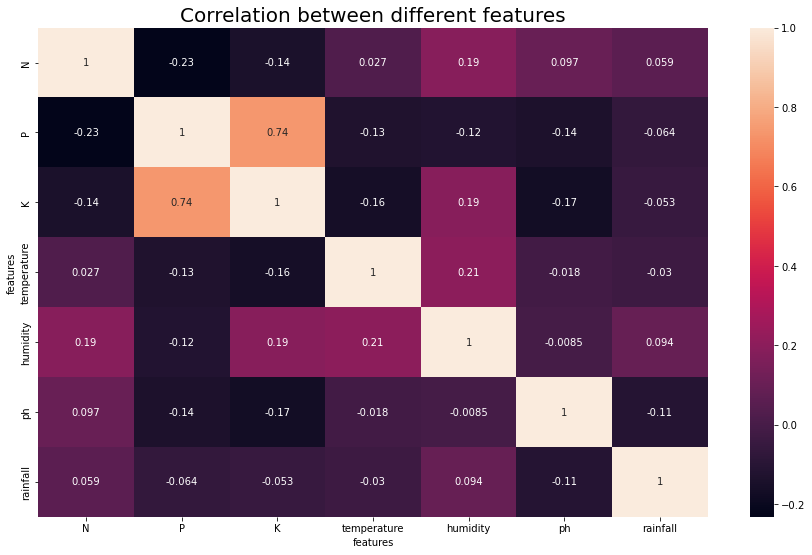

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(df.corr(), annot=True)
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 20, c='black')
plt.show()

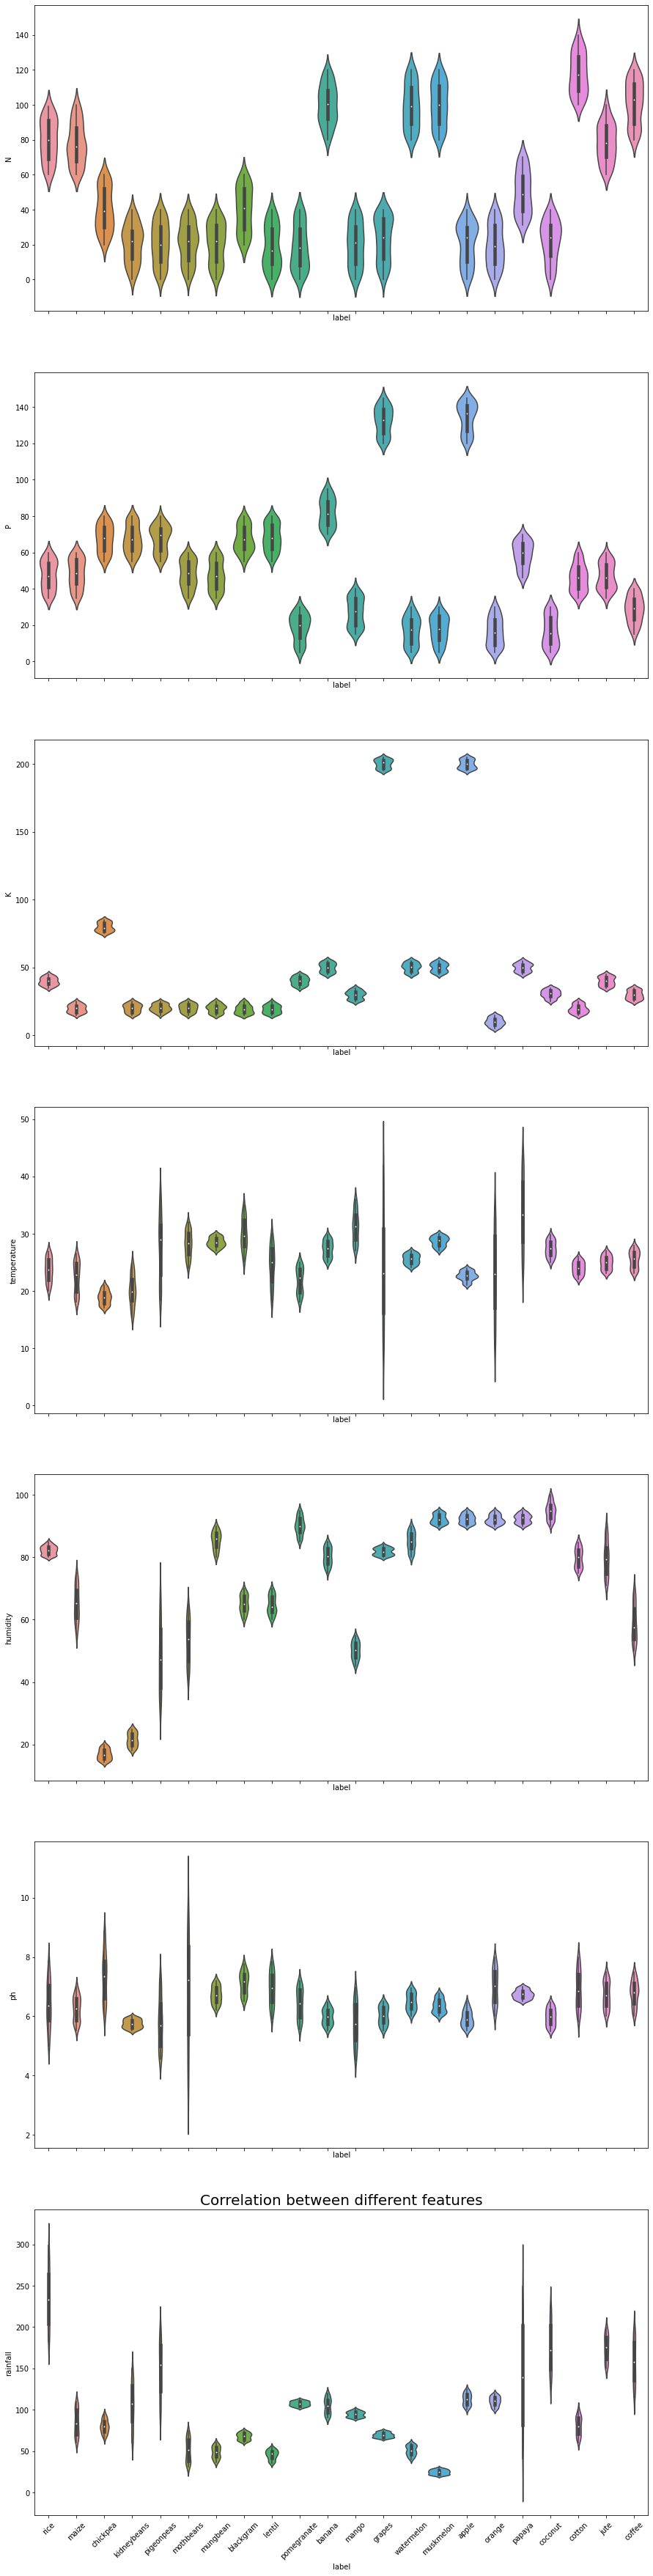

In [29]:
columns = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


fig, ax = plt.subplots(7, 1, figsize=(15, 63), sharex=True)

i = 0
for column in columns:
    sns.violinplot(data=df, x='label', y=column, ax=ax[i])
    plt.xticks(rotation=45)
    i = i + 1

plt.title('Correlation between different features', fontsize = 20, c='black')
plt.show()

## model creation - KNN,XGBoost,Random-forest,Decision-Tree-classifier

In [30]:

from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

target = ['label']
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

models = []
models.append(('LogisticRegression', LogisticRegression(random_state=0)))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier(random_state=0)))
models.append(('XGBClassifier', XGBClassifier(random_state=0)))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier(random_state=0)))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier(random_state=0)))

model_name = []
accuracy = []

for name, model in models: 
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    model_name.append(name)
    accuracy.append(metrics.accuracy_score(y_test,y_pred))
    print(name, metrics.accuracy_score(y_test,y_pred))


LogisticRegression 0.9504132231404959
DecisionTreeClassifier 0.9724517906336089


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21], got ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']

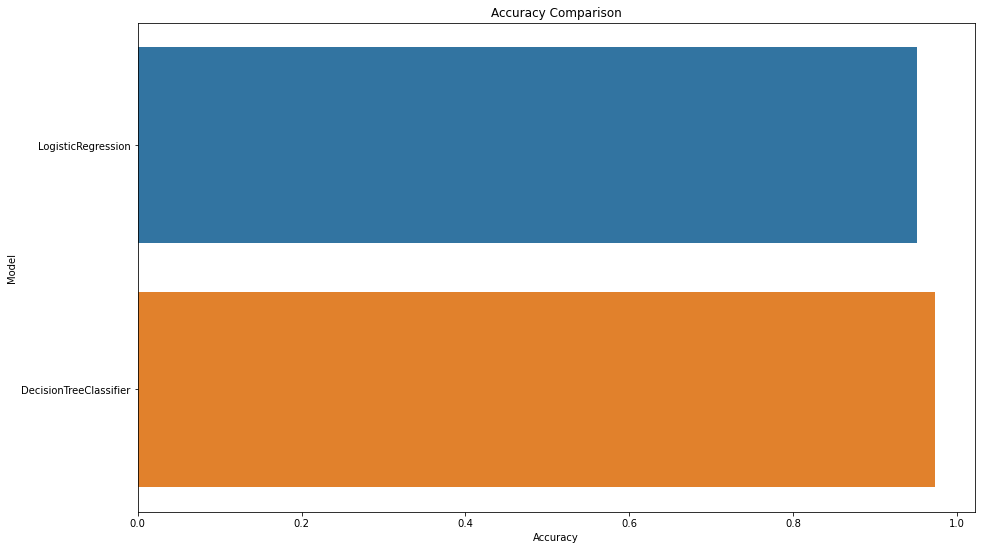

In [31]:
plt.figure(figsize=(15,9))
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
sns.barplot(x = accuracy, y = model_name)
plt.show()

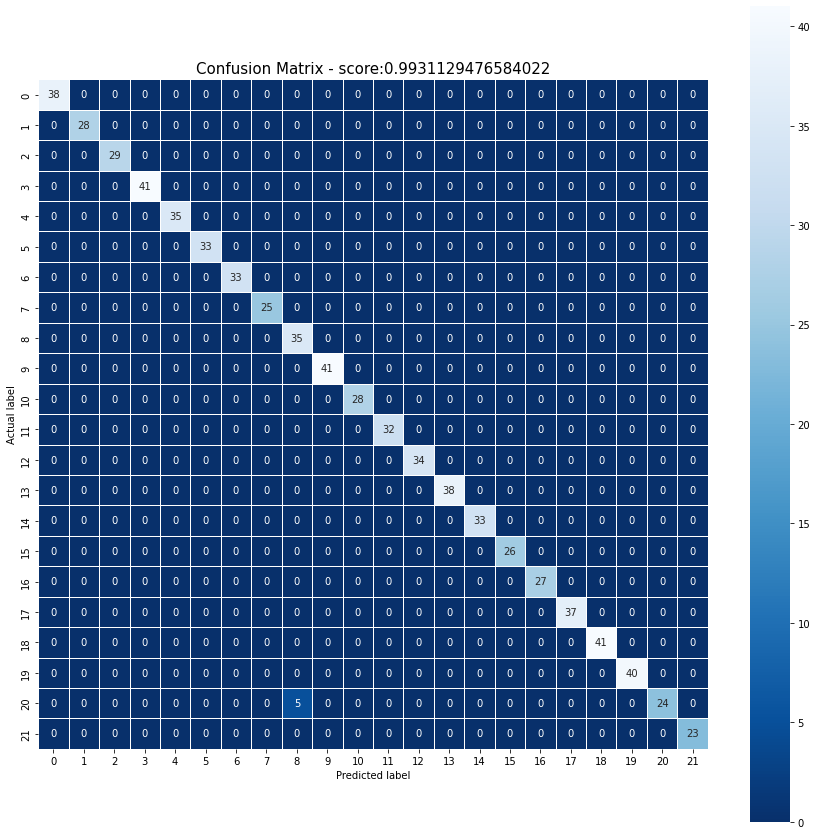

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        38
      banana       1.00      1.00      1.00        28
   blackgram       1.00      1.00      1.00        29
    chickpea       1.00      1.00      1.00        41
     coconut       1.00      1.00      1.00        35
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        33
      grapes       1.00      1.00      1.00        25
        jute       0.88      1.00      0.93        35
 kidneybeans       1.00      1.00      1.00        41
      lentil       1.00      1.00      1.00        28
       maize       1.00      1.00      1.00        32
       mango       1.00      1.00      1.00        34
   mothbeans       1.00      1.00      1.00        38
    mungbean       1.00      1.00      1.00        33
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00        27
      papaya       1.00    

In [32]:
model=RandomForestClassifier(random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))

In [36]:
!pip install dash

In [ ]:
#importing the modules
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State


import plotly.graph_objs as go
import pandas as pd
import numpy as np

#Data loading and cleaning
df=pd.read_csv("C:/Users/rcavi/Desktop/Crop_recommendation.csv")


#features and targets
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
target = 'labels'


feature_options = []
for feature in features:
    feature_options.append({'label':str(feature), 'value':feature})
    
crop_options = []
for crop in df['label'].unique() :
    crop_options.append({'label':str(crop), 'value':crop})

#dashboard layout
app = dash.Dash()

app.layout = html.Div([
                        html.Div([
                                    html.Hr(),
                                    html.H1('Crop Recommendation Dataset'),
                                    html.P('The data used for this app is from the following link:'),
                                    html.A('Crop Recommendation Dataset', href='https://www.kaggle.com/atharvaingle/crop-recommendation-dataset')
                                    ]),
                            
                            
                        html.Div([
                                    html.Hr(),
                                    html.H2('Crop wise statistics'),
                                    html.Div('Select the crop type:'),
                                    dcc.Dropdown(id='crop-picker', options=crop_options, value='rice'),
                                    html.Div([
                                             html.P('N (Nitrogen)'),
                                             html.P(id='N (Nitrogen) mean'),
                                             html.P(id='N (Nitrogen) range'),
                                             ]
                                             , style={'display':'inline-block', 'width':'14%'}),
                                    html.Div([
                                             html.P('P (Phosphorus)'),
                                             html.P(id='P (Phosphorus) mean'),
                                             html.P(id='P (Phosphorus) range'),
                                             ]
                                             , style={'display':'inline-block', 'width':'14%'}),
                                    html.Div([
                                             html.P('K (Potassium)'),
                                             html.P(id='K (Potassium) mean'),
                                             html.P(id='K (Potassium) range'),
                                             ]
                                             , style={'display':'inline-block', 'width':'14%'}),
                                    html.Div([
                                             html.P('Temperature'),
                                             html.P(id='Temperature mean'),
                                             html.P(id='Temperature range'),
                                             ]
                                             , style={'display':'inline-block', 'width':'14%'}),
                                    html.Div([
                                             html.P('Humidity'),
                                             html.P(id='Humidity mean'),
                                             html.P(id='Humidity range'),
                                             ]
                                             , style={'display':'inline-block', 'width':'14%'}),
                                    html.Div([
                                             html.P('pH'),
                                             html.P(id='pH mean'),
                                             html.P(id='pH range'),
                                             ]
                                             , style={'display':'inline-block', 'width':'15%'}),
                                    html.Div([
                                             html.P('Rainfall'),
                                             html.P(id='Rainfall mean'),
                                             html.P(id='Rainfall range'),
                                             ]
                                             , style={'display':'inline-block', 'width':'15%'}),
                                    ]),
                            
                        html.Div([
                                    html.Hr(),
                                    html.H2('Violin plots'),
                                    dcc.Dropdown(id='feature-picker', options=feature_options, value='N'),
                                    dcc.Graph(id='violin_plot'),
                                    ]),
                            
                        html.Div([
                                    html.Hr(),
                                    html.Div('Developed by Avinash R C & Arun Sree E.'),
                                                        
                                    ]),
                        ])


#Nitrogen mean
@app.callback(Output('N (Nitrogen) mean', 'children'),
              [Input('crop-picker', 'value')]
    )

def update_N_mean(selected_crop):
    mean = round(df[df['label'] == selected_crop]['N'].mean(),2)
    return 'Mean: '+str(mean)


#Nitrogen range
@app.callback(Output('N (Nitrogen) range', 'children'),
              [Input('crop-picker', 'value')]
    )


def update_N_range(selected_crop):
    minimum = round(df[df['label'] == selected_crop]['N'].min(),2)
    maximum = round(df[df['label'] == selected_crop]['N'].max(),2)
    return 'Range: '+str(minimum)+' - '+str(maximum)

#Phosphorus mean
@app.callback(Output('P (Phosphorus) mean', 'children'),
              [Input('crop-picker', 'value')]
    )

def update_P_mean(selected_crop):
    mean = round(df[df['label'] == selected_crop]['P'].mean(),2)
    return 'Mean: '+str(mean)

#Phosphorus range
@app.callback(Output('P (Phosphorus) range', 'children'),
              [Input('crop-picker', 'value')]
    )

def update_P_range(selected_crop):
    minimum = round(df[df['label'] == selected_crop]['P'].min(),2)
    maximum = round(df[df['label'] == selected_crop]['P'].max(),2)
    return 'Range: '+str(minimum)+' - '+str(maximum)


#Potassium mean
@app.callback(Output('K (Potassium) mean', 'children'),
              [Input('crop-picker', 'value')]
    )

def update_K_mean(selected_crop):
    mean = round(df[df['label'] == selected_crop]['K'].mean(),2)
    return 'Mean: '+str(mean)

#Potassium range
@app.callback(Output('K (Potassium) range', 'children'),
              [Input('crop-picker', 'value')]
    )

def update_K_range(selected_crop):
    minimum = round(df[df['label'] == selected_crop]['K'].min(),2)
    maximum = round(df[df['label'] == selected_crop]['K'].max(),2)
    return 'Range: '+str(minimum)+' - '+str(maximum)


#Temperature mean
@app.callback(Output('Temperature mean', 'children'),
              [Input('crop-picker', 'value')]
    )

def update_temperature_mean(selected_crop):
    mean = round(df[df['label'] == selected_crop]['temperature'].mean(),2)
    return 'Mean: '+str(mean)

#Temperature range
@app.callback(Output('Temperature range', 'children'),
              [Input('crop-picker', 'value')]
    )

def update_temperature_range(selected_crop):
    minimum = round(df[df['label'] == selected_crop]['temperature'].min(),2)
    maximum = round(df[df['label'] == selected_crop]['temperature'].max(),2)
    return 'Range: '+str(minimum)+' - '+str(maximum)


#Humidity mean
@app.callback(Output('Humidity mean', 'children'),
              [Input('crop-picker', 'value')]
    )

def update_humidity_mean(selected_crop):
    mean = round(df[df['label'] == selected_crop]['humidity'].mean(),2)
    return 'Mean: '+str(mean)


#Humidity range
@app.callback(Output('Humidity range', 'children'),
              [Input('crop-picker', 'value')]
    )

def update_humidity_range(selected_crop):
    minimum = round(df[df['label'] == selected_crop]['humidity'].min(),2)
    maximum = round(df[df['label'] == selected_crop]['humidity'].max(),2)
    return 'Range: '+str(minimum)+' - '+str(maximum)

#pH mean
@app.callback(Output('pH mean', 'children'),
              [Input('crop-picker', 'value')]
    )

def update_ph_mean(selected_crop):
    mean = round(df[df['label'] == selected_crop]['ph'].mean(),2)
    return 'Mean: '+str(mean)

#pH mean
@app.callback(Output('pH range', 'children'),
              [Input('crop-picker', 'value')]
    )

def update_ph_range(selected_crop):
    minimum = round(df[df['label'] == selected_crop]['ph'].min(),2)
    maximum = round(df[df['label'] == selected_crop]['ph'].max(),2)
    return 'Range: '+str(minimum)+' - '+str(maximum)


#Rainfall mean
@app.callback(Output('Rainfall mean', 'children'),
              [Input('crop-picker', 'value')]
    )

def update_rainfall_mean(selected_crop):
    mean = round(df[df['label'] == selected_crop]['rainfall'].mean(),2)
    return 'Mean: '+str(mean)


#Rainfall range
@app.callback(Output('Rainfall range', 'children'),
              [Input('crop-picker', 'value')]
    )

def update_rainfall_range(selected_crop):
    minimum = round(df[df['label'] == selected_crop]['rainfall'].min(),2)
    maximum = round(df[df['label'] == selected_crop]['rainfall'].max(),2)
    return 'Range: '+str(minimum)+' - '+str(maximum)

#Violin plot
@app.callback(Output('violin_plot', 'figure'),
              [Input('feature-picker','value')]
              )

def update_violin_plot(selected_feature):
    
    violin_plot = go.Violin(
                    x = df['label'],
                    y = df[selected_feature],
                    name='violin plot')

    data1 = [violin_plot]
    
    layout1 = go.Layout(title=selected_feature,
                      xaxis = dict(title='Crop'),
                      yaxis = dict(title=selected_feature))
    
    return {'data':data1,'layout':layout1}    


if __name__ == '__main__':
    app.run_server()


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [12/Feb/2023 00:11:42] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Feb/2023 00:11:42] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_8_1m1676140713.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [12/Feb/2023 00:11:42] "GET /_dash-component-suites/dash/deps/prop-types@15.v2_8_1m1676140713.8.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [12/Feb/2023 00:11:42] "GET /_dash-component-suites/dash/deps/react@16.v2_8_1m1676140713.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [12/Feb/2023 00:11:42] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_8_1m1676140713.12.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [12/Feb/2023 00:11:42] "GET /_dash-component-suites/dash/dcc/dash_core_components-shared.v2_8_0m1676140713.js HTTP/1.1" 200 -
127.0.0.1 - - [12/Feb/2023 00:11:42] "GET /_dash-component-suites/dash/dash_table/bundle.v5_2_2m1676140713.js HTTP/1.1" 200 -
127.0.0.1 - - [12/Feb/2023 00:11:42] "GET /_dash-component-suites/dash/html/dash

127.0.0.1 - - [12/Feb/2023 00:21:48] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Feb/2023 00:21:48] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Feb/2023 00:21:48] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Feb/2023 00:21:48] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Feb/2023 00:21:48] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Feb/2023 00:21:48] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Feb/2023 00:21:48] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Feb/2023 00:21:48] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Feb/2023 00:21:48] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Feb/2023 00:21:48] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Feb/2023 00:21:48] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Feb/2023 00:21:54] "GET /_dash-component-suites/dash/dcc/dash_core_co